In [ ]:
import pandas as pd

In [34]:
df1 = pd.read_pickle('/data/bias_task/derivatives/ddm_results/traces_ds-01.pkl')
df1['dataset'] = 'ds-01'
df2 = pd.read_pickle('/data/bias_task/derivatives/ddm_results/traces_ds-02.pkl')
df2['dataset'] = 'ds-02'
df = pd.concat((df1, df2))

/Users/gilles/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [35]:
import matplotlib.pyplot as plt

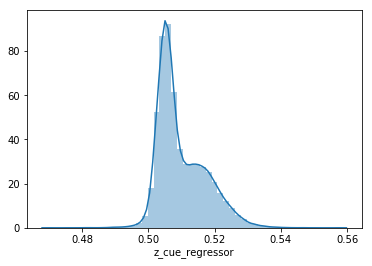

In [36]:
import numpy as np
sns.distplot(1 / (1 + np.exp(-df['z_cue_regressor'])))

In [37]:
import re
reg = re.compile('(?P<variable>.+)_subj.(?P<subject>.+)')

In [38]:
tmp = df.melt(id_vars='dataset')
tmp['tmp'] = tmp.variable.apply(lambda x: reg.match(x).groupdict() if reg.match(x) else None)

tmp = tmp[~tmp.tmp.isnull()]
tmp['variable'] = tmp.tmp.apply(lambda x: x['variable'])
tmp['subject'] = tmp.tmp.apply(lambda x: x['subject'])
tmp.drop('tmp', axis=1, inplace=True)
df = tmp

In [20]:
import seaborn as sns

(-0.5, 14.5)

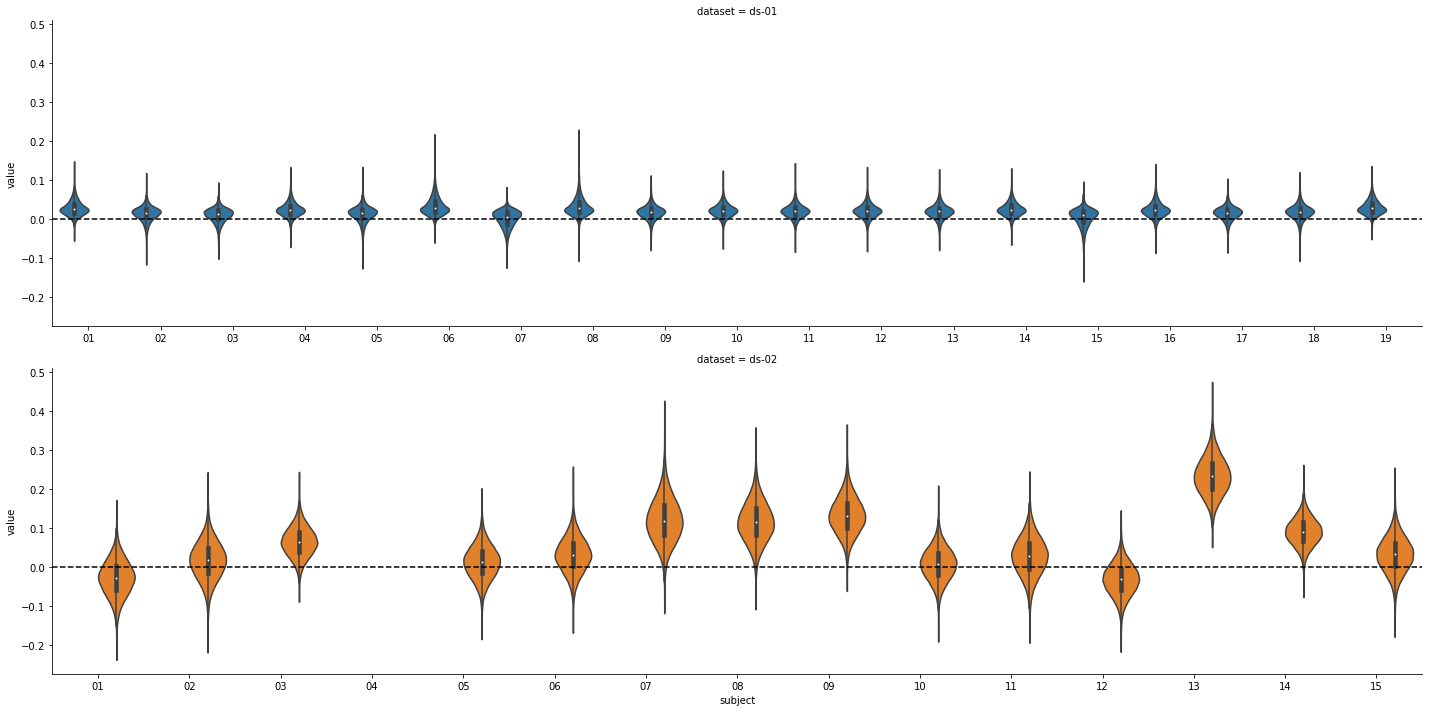

In [30]:
fac = sns.catplot('subject', 'value', 'dataset', data=df[df.variable == 'z_cue_regressor'], row='dataset', kind='violin', sharex=False, aspect=4)
for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    
ax.set_xlim(-.5, 14.5)

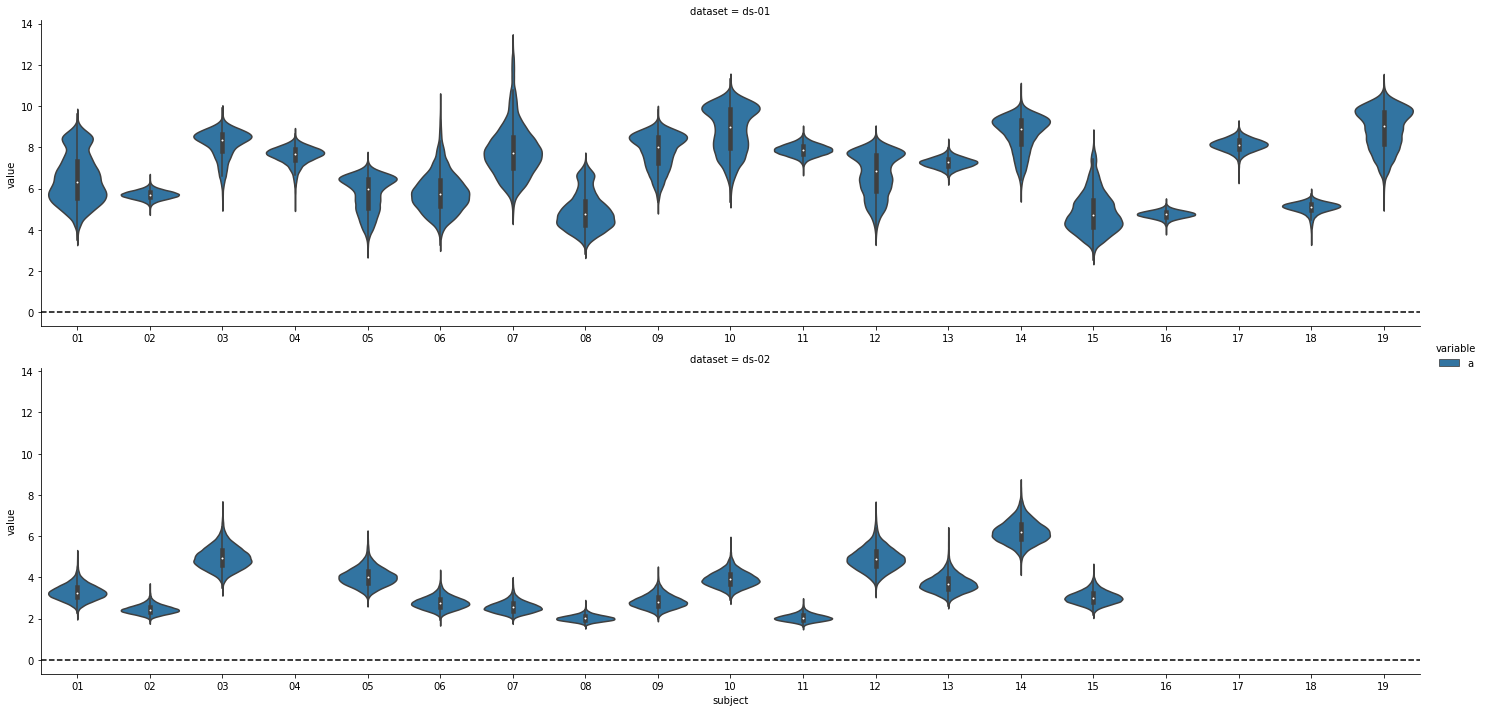

In [23]:
fac = sns.catplot('subject', 'value', 'variable', data=df[df.variable.isin(['a'])], row='dataset', kind='violin', sharex=False, aspect=4)
for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')

In [ ]:
fac = sns.catplot('value', 'subject', 'variable', data=df[df.variable.isin(['v_C(difficulty)[easy]', 'v_C(difficulty)[hard]'])], row='dataset', kind='violin', sharex=False, aspect=4)

In [39]:
import pandas as pd

In [124]:
beh = pd.read_pickle('/data/bias_task/derivatives/behavior.pkl').rename(columns={'ds':'dataset'})

In [149]:
behavior_difficulty = beh.pivot_table(index=['dataset', 'subject'], columns='difficulty', values=['correct', 'rt'])
difference =pd.concat([(behavior_difficulty.swaplevel(axis=1)['easy'] - behavior_difficulty.swaplevel(axis=1)['hard'])], keys=['difference'], axis=1).swaplevel(axis=1)
behavior_difficulty = pd.concat((behavior_difficulty, difference), axis=1)

In [157]:
behavior_cue = beh.pivot_table(index=['dataset', 'subject'], columns='cue congruency', values=['correct', 'rt'])
difference =pd.concat([(behavior_cue.swaplevel(axis=1)['incongruent'] - behavior_cue.swaplevel(axis=1)['congruent'])], keys=['difference'], axis=1).swaplevel(axis=1)
behavior_cue = pd.concat((behavior_cue, difference), axis=1)

In [179]:
mean_behavior = pd.concat((behavior_difficulty, behavior_cue), keys=['difficulty', 'cue'], axis=1)

In [180]:
mean_pars = df.pivot_table(index=['dataset', 'subject'], columns='variable', values='value', aggfunc='mean')

In [181]:
mean_pars = df.pivot_table(index=['dataset', 'subject'], columns='variable', values='value', aggfunc='mean')
mean_pars['z_ddm_scale'] = 1 / (1 + np.exp(-mean_pars['z_cue_regressor']))
mean_pars['difficulty_effect'] = mean_pars['v_C(difficulty)[easy]'] - mean_pars['v_C(difficulty)[hard]']

In [184]:
mean_behavior.columns = [' '.join(col).strip() for col in mean_behavior.columns.values]

In [188]:
mean_all = pd.concat((mean_behavior, mean_pars), keys=['behavior', 'ddm'], axis=1)
mean_all.columns = [' '.join(col).strip() for col in mean_all.columns.values]

In [190]:
mean_pars.head()

variable                a         t  v_C(difficulty)[easy]  \
dataset subject                                              
ds-01   01       6.488318  0.143460               4.640534   
        02       5.708537  0.001677               3.571524   
        03       8.182950  0.029900               5.244812   
        04       7.609993  0.015620               4.668687   
        05       5.743335  0.066901               4.210507   

variable         v_C(difficulty)[hard]  z_cue_regressor  z_ddm_scale  \
dataset subject                                                        
ds-01   01                    4.626869         0.028724     0.507180   
        02                    3.462652         0.014512     0.503628   
        03                    5.130225         0.011192     0.502798   
        04                    4.716953         0.025053     0.506263   
        05                    3.952648         0.014188     0.503547   

variable         difficulty_effect  
dataset subject                     
ds-01   01                0.013665  
        02                0.108871  
        03                0.114586  
        04               -0.048266  
        05                0.257859

In [189]:
mean_all.head()

behavior difficulty correct easy  \
dataset subject                                     
ds-01   01                               0.697917   
        02                               0.598958   
        03                               0.661458   
        04                               0.546875   
        05                               0.588542   

                 behavior difficulty correct hard  \
dataset subject                                     
ds-01   01                               0.552083   
        02                               0.520833   
        03                               0.578125   
        04                               0.562500   
        05                               0.520833   

                 behavior difficulty rt easy  behavior difficulty rt hard  \
dataset subject                                                             
ds-01   01                        833.140625                   830.401042   
        02                        796.239583                   790.802083   
        03                        798.994792                   816.072917   
        04                        821.494792                   812.531250   
        05                        540.567708                   601.682292   

                 behavior difficulty correct difference  \
dataset subject                                           
ds-01   01                                     0.145833   
        02                                     0.078125   
        03                                     0.083333   
        04                                    -0.015625   
        05                                     0.067708   

                 behavior difficulty rt difference  \
dataset subject                                      
ds-01   01                                2.739583   
        02                                5.437500   
        03                              -17.078125   
        04                                8.963542   
        05                              -61.114583   

                 behavior cue correct congruent  \
dataset subject                                   
ds-01   01                             0.572917   
        02                             0.614583   
        03                             0.635417   
        04                             0.864583   
        05                             0.552083   

                 behavior cue correct incongruent  \
dataset subject                                     
ds-01   01                               0.635417   
        02                               0.520833   
        03                               0.593750   
        04                               0.229167   
        05                               0.520833   

                 behavior cue correct neutral  behavior cue rt congruent  ...  \
dataset subject                                                           ...   
ds-01   01                           0.645833                 826.989583  ...   
        02                           0.552083                 815.875000  ...   
        03                           0.625000                 806.885417  ...   
        04                           0.562500                 769.708333  ...   
        05                           0.572917                 559.937500  ...   

                 behavior cue rt neutral  behavior cue correct difference  \
dataset subject                                                             
ds-01   01                    821.140625                         0.062500   
        02                    786.598958                        -0.093750   
        03                    807.937500                        -0.041667   
        04                    852.552083                        -0.635417   
        05                    579.338542                        -0.031250   

                 behavior cue rt difference     ddm a     ddm t  \
dataset subject                    

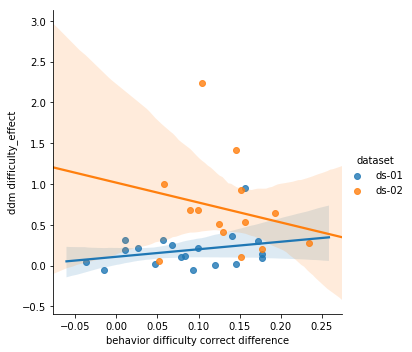

In [205]:
sns.lmplot('behavior difficulty correct difference', 'ddm difficulty_effect', hue='dataset', data=mean_all.reset_index())

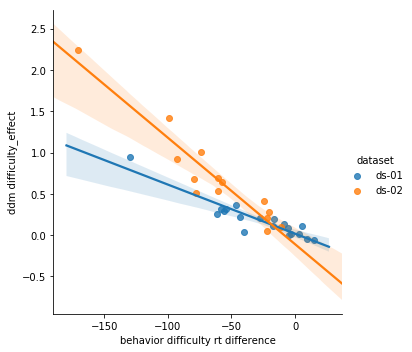

In [203]:
sns.lmplot('behavior difficulty rt difference', 'ddm difficulty_effect', hue='dataset', data=mean_all.reset_index())

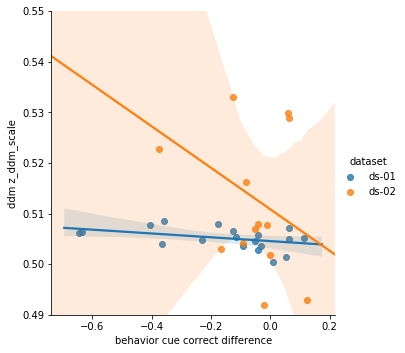

In [206]:
fac = sns.lmplot('behavior cue correct difference', 'ddm z_ddm_scale', hue='dataset', data=mean_all.reset_index(), robust=True)

fac.set(ylim=(0.49, 0.55))

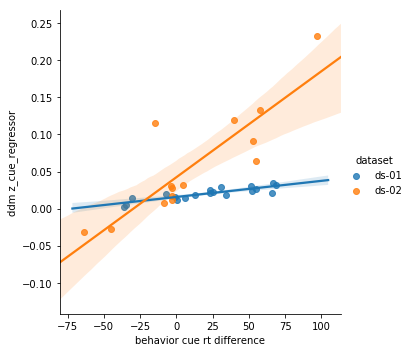

In [200]:
sns.lmplot('behavior cue rt difference', 'ddm z_cue_regressor', hue='dataset', data=mean_all.reset_index())